In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

import glob
import pandas as pd
import numpy as np
import ast
import collections


In [27]:

#infile = "/home/isaac/gimmeSAD/output/megalog.txt"
infile = "/home/isaac/gimmeSAD/simout/K_5000-C_0.005_1528580624.24_4/megalog.txt"
df = pd.read_csv(infile, sep="\t")
#print(df[df["mig_rate"] > 0])
sortdf = df.sort_values(by=["pi_island"], axis=0, ascending=False)
print(sortdf[:10])

          %eq     step  Species_uuid  Col_time  mig_rate  Loc_Abund  \
4259   0.4752   500000          4597    4300.0  0.000019        219   
2719   0.3200   350000           928    2700.0  0.000045        102   
8832   0.5406   930000          2075   18200.0  0.000007         55   
5335   0.4828   610000          3151    9900.0  0.000024        227   
5047   0.4654   580000          1255    3600.0  0.000023        115   
10627  0.6976  1080000          1177    9600.0  0.000008        123   
5122   0.4670   590000          4095    4700.0  0.000013         50   
14523  0.9620  3900000          3411   31000.0  0.000014        635   
6462   0.5304   720000          4669    3700.0  0.000022        229   
13342  0.9646  2900000          2266   46000.0  0.000010        379   

       Meta_Abund        pi    pi_net       Dxy   S  S_island  pi_island  \
4259         9800  0.042339 -0.005579  0.039860  50        45   0.046667   
2719        15400  0.038402 -0.004456  0.036421  44        37   0.

This is a note to myself about why i made this setting
# wat

(1, 2, 4, 8, 16)
(11, 11, 8, 7, 7)


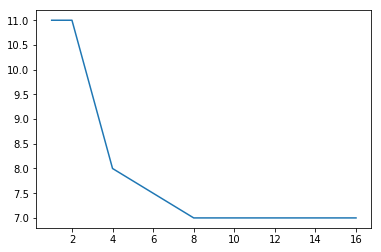

In [4]:
data = "[(1, 11), (2, 8), (3, 3), (4, 3), (5, 1), (6, 3), (7, 1), (8, 2), (9, 3), (12, 2), (16, 1), (17, 1), (19, 1), (20, 1), (23, 1), (25, 1), (31, 1), (33, 1), (38, 1), (54, 1), (55, 1), (83, 1)]"
datb = "[(1, 11), (2, 11), (4, 8), (8, 7), (16, 7)]"
abunds = collections.OrderedDict(ast.literal_eval(data))
octaves = collections.OrderedDict(ast.literal_eval(datb))
x, y = zip(*octaves.items())
print(x)
print(y)
plt.plot(x, y)


[83, 55, 54, 38, 33, 31, 25, 23, 20, 19, 17, 16, 12, 12, 9, 9, 9, 8, 8, 7, 6, 6, 6, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


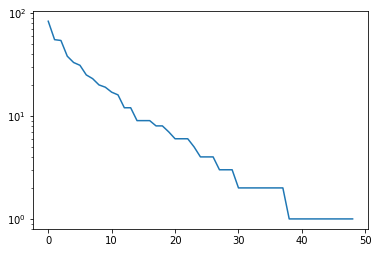

In [61]:
RAC = []
[RAC.extend([x] * abunds[x]) for x in abunds.keys()]
RAC = RAC[::-1]
print(RAC)
X = np.arange(0,len(RAC))
plt.semilogy(X, RAC, label="simulated")

nfiles - 100


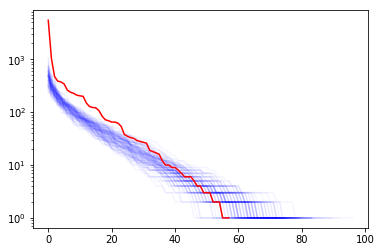

In [9]:
RACS = []
## get a bunch of them
files = glob.glob("/home/isaac/gimmeSAD/simout/K_*/gimmeSAD.out")
files = files[:100]
print("nfiles - {}".format(len(files)))
for f in files:
    dat = open(f).readlines()[1]
    dat = dat.split("-")[1].strip().split("[")[1].split(']')[0]
    #print(dat)
    abunds = collections.OrderedDict(ast.literal_eval(dat))
    RAC = []
    [RAC.extend([x] * abunds[x]) for x in abunds.keys()]
    RAC = sorted(RAC)
    RAC = RAC[::-1]
    RACS.append(RAC)

for i, RAC in enumerate(RACS):
    X = np.arange(0,len(RAC))
    plt.semilogy(X, RAC, label="simulated", alpha=0.04, color="b")
emp_abunds = list(ast.literal_eval("[5493, 1042, 471, 387, 374, 343, 263, 239, 228, 210, 204, 200, 150, 128, 123, 121, 107, 84, 72, 69, 65, 65, 62, 54, 38, 35, 33, 32, 29, 28, 27, 26, 19, 18, 17, 16, 12, 10, 10, 9, 9, 8, 7, 6, 6, 6, 5, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1]"))
X = np.arange(0,len(emp_abunds))
plt.semilogy(X, emp_abunds, color="r")

In [127]:
emp_1d_sgd = [8, 25, 7, 4, 1, 3, 2, 4, 1, 2]

nan